In [155]:
import numpy as np
import pandas as pd

In [156]:
temp_df = pd.read_csv('IMDB Dataset.csv')

In [157]:
df = temp_df.iloc[:2000]

In [158]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [159]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [160]:
df['sentiment'].value_counts()

sentiment
positive    1005
negative     995
Name: count, dtype: int64

In [161]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [162]:
df.duplicated().sum()

np.int64(0)

In [163]:
df.drop_duplicates(inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9228\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [164]:
df.duplicated().sum()

np.int64(0)

In [165]:
#Basic Preprocessing
#Remove tags
#Lowercase
#remove stopwords

In [166]:
import re 
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '',raw_text)
    return cleaned_text

In [167]:
df['review'] = df['review'].apply(remove_tags)


C:\Users\hp\AppData\Local\Temp\ipykernel_9228\1164145055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_tags)


In [168]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
1995,"Feeling Minnesota, directed by Steven Baigelma...",negative
1996,"THE CELL (2000) Rating: 8/10The Cell, like Ant...",positive
1997,"This movie, despite its list of B, C, and D li...",negative
1998,I loved this movie! It was all I could do not ...,positive


In [169]:
df['review'] = df['review'].apply(lambda x:x.lower())

C:\Users\hp\AppData\Local\Temp\ipykernel_9228\740760900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x:x.lower())


In [170]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [171]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

C:\Users\hp\AppData\Local\Temp\ipykernel_9228\2826946130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))


In [172]:
df

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive
...,...,...
1995,"feeling minnesota, directed steven baigelmann,...",negative
1996,"cell (2000) rating: 8/10the cell, like antz, m...",positive
1997,"movie, despite list b, c, list celebs, complet...",negative
1998,"loved movie! could break tears watching it, re...",positive


In [173]:
x = df.iloc[:,0:1]
y = df['sentiment']

In [174]:
x

,review
0,one reviewers mentioned watching 1 oz episode ...
1,wonderful little production. filming technique...
2,thought wonderful way spend time hot summer we...
3,basically there's family little boy (jake) thi...
4,"petter mattei's ""love time money"" visually stu..."
...,...
1995,"feeling minnesota, directed steven baigelmann,..."
1996,"cell (2000) rating: 8/10the cell, like antz, m..."
1997,"movie, despite list b, c, list celebs, complet..."
1998,"loved movie! could break tears watching it, re..."


In [175]:
y

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
1995    negative
1996    positive
1997    negative
1998    positive
1999    negative
Name: sentiment, Length: 2000, dtype: object

In [176]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [177]:
y

array([1, 1, 1, ..., 0, 1, 0], shape=(2000,))

In [178]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [179]:
x_train.shape

(1600, 1)

In [180]:
#Applying BOW
from sklearn.feature_extraction.text import CountVectorizer

In [181]:
cv = CountVectorizer()

In [182]:
x_train_bow = cv.fit_transform(x_train['review']).toarray()
x_test_bow = cv.transform(x_test['review']).toarray()


In [183]:
x_train_bow.shape
#(Feature, Vocubulary)

(1600, 22907)

In [184]:
# Model Training
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(x_train_bow, y_train)

,priors,None
,var_smoothing,1e-09


In [185]:
y_pred = gnb.predict(x_test_bow)

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.6225

In [188]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[135,  80],
       [ 71, 114]])

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

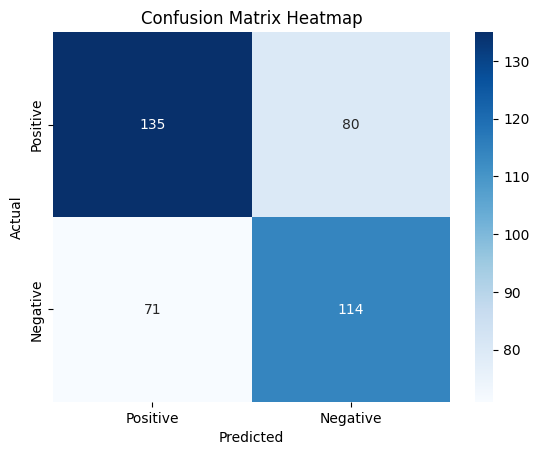

In [191]:
labels = ['Positive', 'Negative']

# Plot heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

# Show plot
plt.show()

In [192]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train_bow, y_train)
y_pred = rf.predict(x_test_bow)
accuracy_score(y_test, y_pred)


0.79

In [193]:
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[163,  52],
       [ 32, 153]])

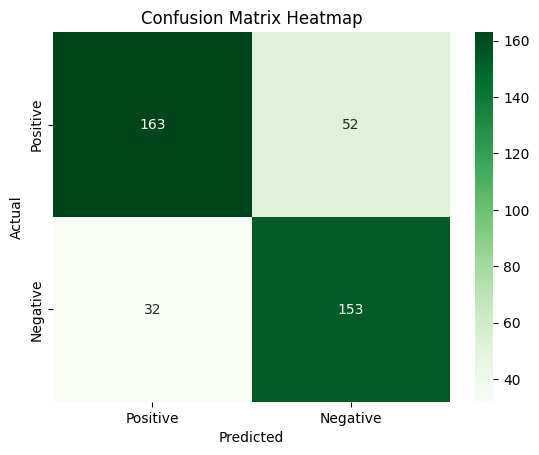

In [195]:
labels = ['Positive', 'Negative']

# Plot heatmap
sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

# Show plot
plt.show()

In [199]:
cv = CountVectorizer(ngram_range=(1,2), max_features=5000)

X_train_bow = cv.fit_transform(x_train['review']).toarray()
X_test_bow = cv.transform(x_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(x_train_bow,y_train)
y_pred = rf.predict(x_test_bow)
accuracy_score(y_test,y_pred)

0.7875

In [200]:
#Using TfIdf

In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [203]:
tfidf = TfidfVectorizer()

In [205]:
x_train_tfidf = tfidf.fit_transform(x_train['review']).toarray()
x_test_tfidf = tfidf.transform(x_test['review'])

In [209]:
rf = RandomForestClassifier()

rf.fit(x_train_tfidf,y_train)
y_pred = rf.predict(x_test_tfidf)

accuracy_score(y_test,y_pred)

0.795